In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
[each for each in boston.feature_names]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [5]:
import pandas as pd
boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_pd['PRICE'] = boston.target

boston_pd.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

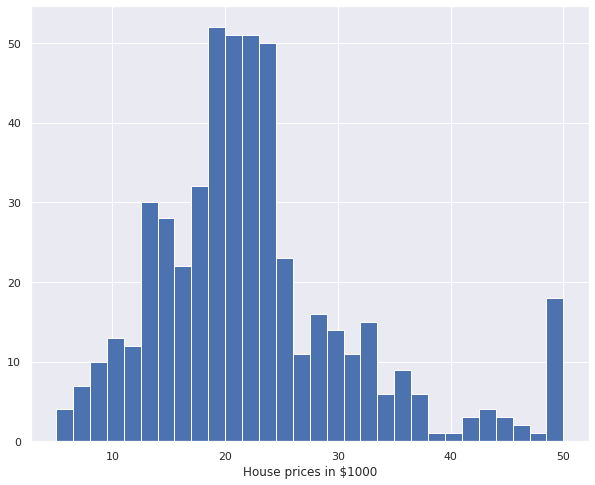

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(10,8)})
plt.hist(boston_pd['PRICE'],bins = 30)
plt.xlabel('House prices in $1000')
plt.show()

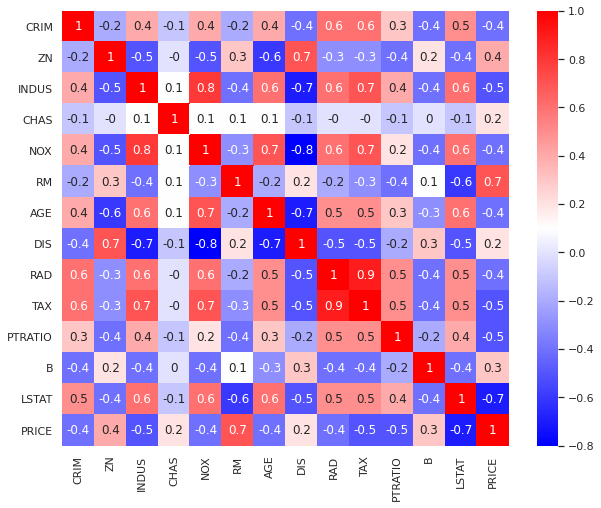

In [11]:
correlation_matrix = boston_pd.corr().round(1)
sns.heatmap(data = correlation_matrix, annot=True ,cmap="bwr")

### 상관관계를 분석할 때, 인과 관계까지 데이터를 통해서 알 수 는 없다.
- PRICE 데이터 <-> RM 과 LSTAT 부분과 비례,반비례 하는 관계를 확인 가능
그러나, 이 데이터간의 인과 관계는 알려주지 않는다는 것!

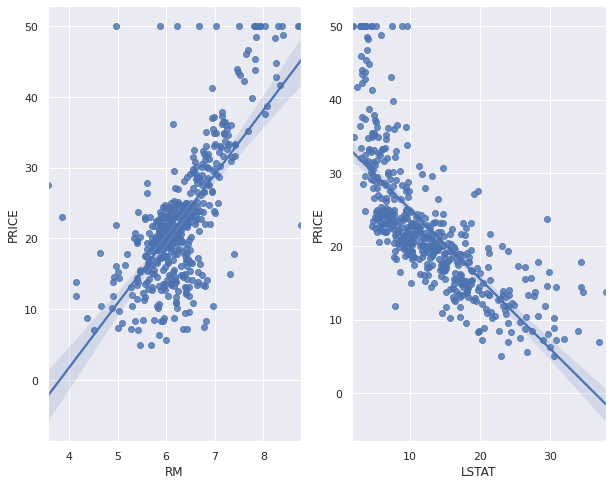

In [15]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols = 2 )
sns.regplot(x = 'RM',y = 'PRICE',data = boston_pd,ax=axs[0])
sns.regplot(x = 'LSTAT',y = 'PRICE',data = boston_pd,ax=axs[1])

- 방수가 많을수록 집가격이 높아짐을 확인 가능
- 저소득층 인구가 낮을수록 가격이 높아집을 확인 가능

In [19]:
import numpy as np

X_rooms = boston_pd['RM']
y_price = boston_pd['PRICE']

X_rooms = np.array(X_rooms).reshape(-1,1)
print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506,)


In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_rooms,y_price,test_size = 0.2,random_state = 13)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- sklearn.linear_model의 LinearRegression은 MSE(Mean Square Erorr) 를 이용하여
fit 명령어를 통해 학습을 진행한다.

### 선형회귀 학습모델은 모델평가를 MEAN_SQURE_ERROR 값을 확인함으로써 측정한다.

In [29]:
from sklearn.metrics import mean_squared_error

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))

print('The mopdel performance for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance for training set
----------------------------------------
RMSE : 6.558400914980574


In [30]:
y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))

print('The mopdel performance for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance for training set
----------------------------------------
RMSE : 6.7881975443771765


 ## 성능평가는 mean_squre error 값을 확인함으로써 완료한다. -> 직관적 x
 # 구축한 모델을 그려보자

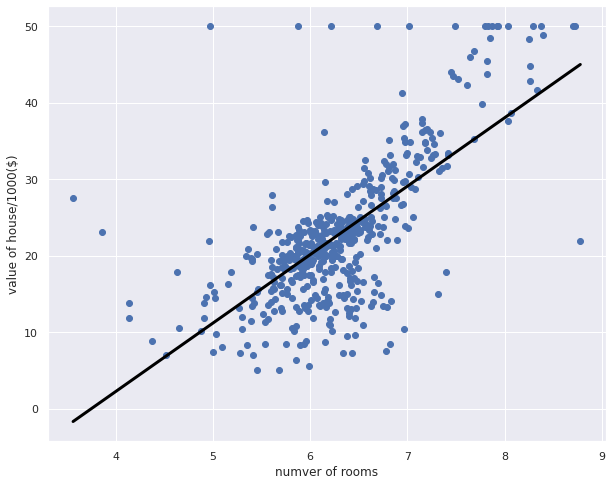

In [34]:
prediction_space = np.linspace(min(X_rooms),max(X_rooms))
# x 축의 값

plt.scatter(X_rooms,y_price)
# 실제값은 scatter을 이용하여 그린다.

plt.plot(prediction_space, reg.predict(prediction_space),
         color = 'black',linewidth = 3)
# 예측값은 plot으로 선을 그리게 한다.

plt.ylabel('value of house/1000($)')
plt.xlabel('numver of rooms')
plt.show()

#### 지금까지는 RM 을 이용해서 학습을 완료함 
## 전체 특성(feature)을 이용하여 학습해보자

In [37]:
x = boston_pd.drop('PRICE',axis = 1)
y = boston_pd['PRICE']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.metrics import mean_squared_error

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))

print('The mopdel performance for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance for training set
----------------------------------------
RMSE : 4.642806069019824


In [40]:
y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))

print('The mopdel performance for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance for training set
----------------------------------------
RMSE : 4.9313525841467


### 전체 특성을 고려한 모델의 결과를 그래프로 확인할 때는, 각각의 결과값을 축으로 사용하는 방법을 이용함
( 위 특정 데이터에 대한 그래프를 그릴때에도 이렇게 그릴 수 있다.
하지만, 전체 특성이 많을때 학습모델을 눈으로 확인하고 싶을때는 이 방법이 유일할 것 같다)

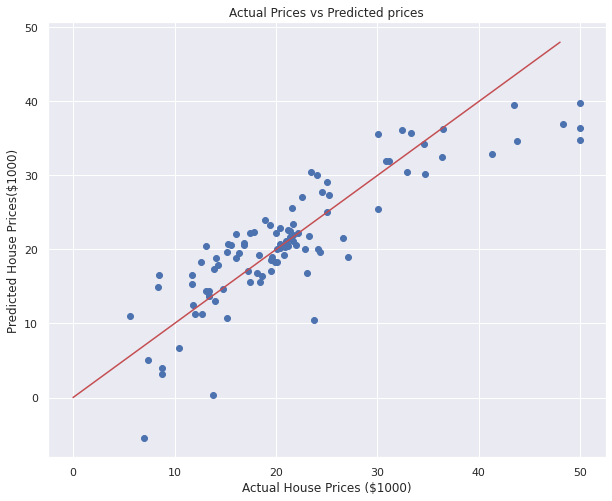

In [44]:
plt.scatter(y_test,y_test_predict)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted House Prices($1000)')
plt.title("Actual Prices vs Predicted prices")
plt.plot([0,48],[0,48],'r')